In [31]:
from CardiacMap.cascade_parser import cascade_import
from matplotlib import pyplot as plt
import numpy as np
import torch

from scipy import ndimage

import timeit

In [2]:
offset = 10 # number of offset frames
x_pos = 64
y_pos = 64
span = 128
num_frames = 5000
frame_idx = 2500

In [3]:
im_raw = cascade_import("2012-02-13_Exp000_Rec005_Cam3-Blue.dat")

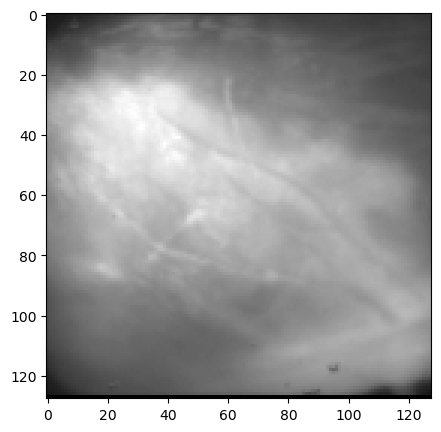

In [6]:
plt.figure(figsize=(15, 5))
plt.imshow(im_raw[frame_idx, :], cmap='gray')

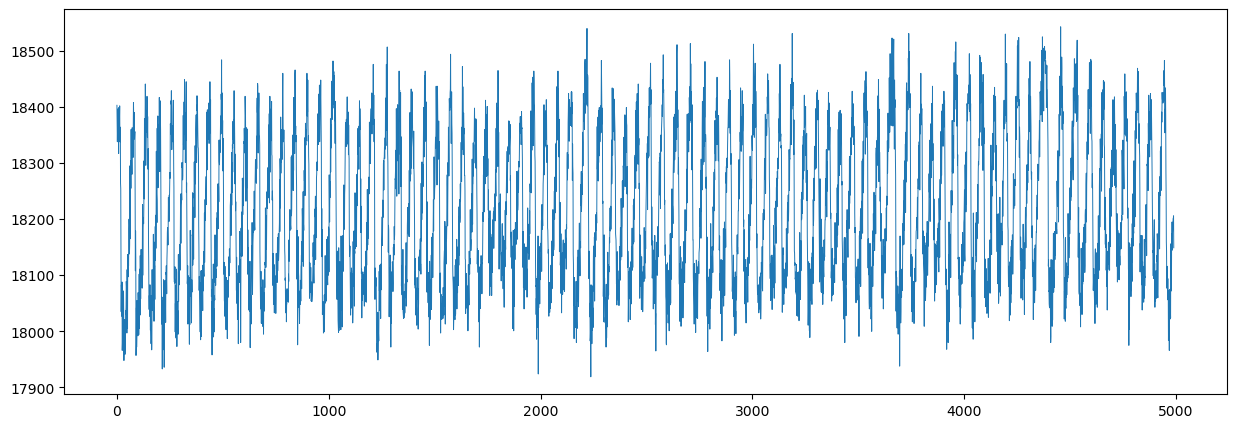

In [39]:
plt.figure(figsize=(15, 5))
plt.plot(im_raw[offset:, x_pos, y_pos], linewidth=0.7)

In [35]:
# Apply kernel across time domain
print(timeit.timeit(lambda: ndimage.uniform_filter(im_raw, axes=0), number=10))

16.841589745999954


In [18]:
print(timeit.timeit(lambda: ndimage.gaussian_filter(im_raw, sigma=1, axes=0), number=10))

15.591072384995641


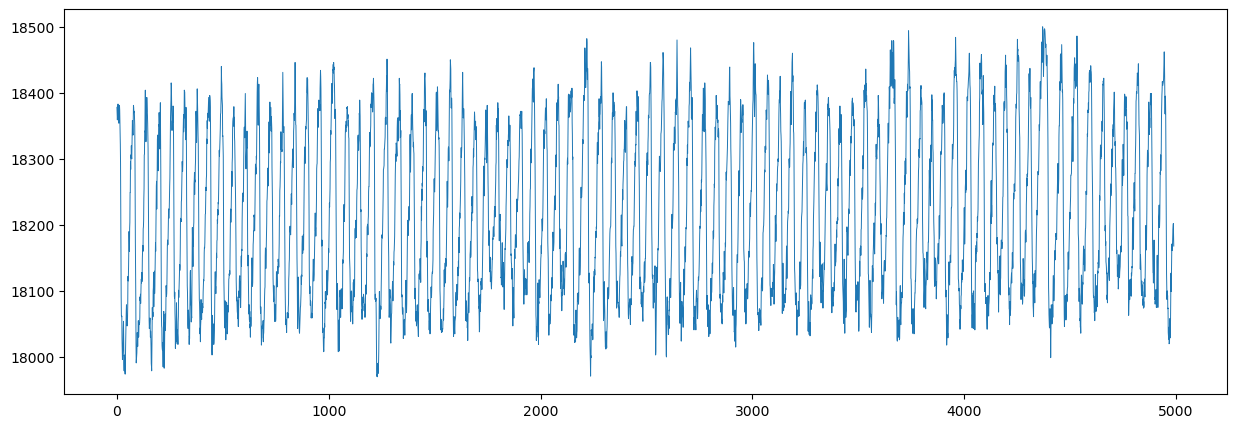

In [7]:
processed = ndimage.uniform_filter(im_raw, axes=0)
plt.figure(figsize=(15, 5))
plt.plot(processed[offset:,  x_pos, y_pos], linewidth=0.7)

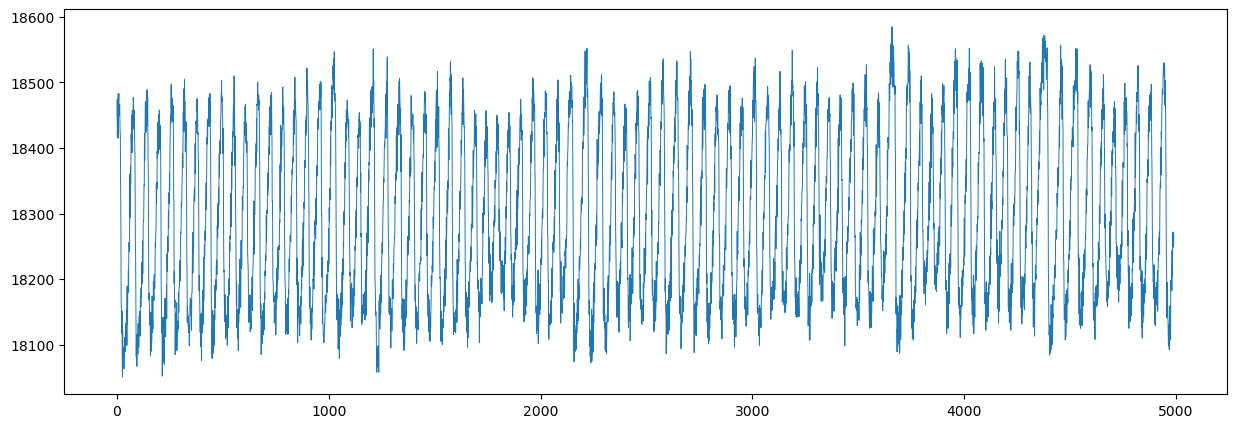

In [34]:
processed = ndimage.gaussian_filter1d(im_raw, sigma=1)
plt.figure(figsize=(15, 5))
plt.plot(processed[offset:,  x_pos, y_pos], linewidth=0.7)

In [24]:
print(timeit.timeit(lambda: ndimage.uniform_filter(im_raw, axes=[1, 2]), number=10))

4.523087986999599


In [25]:
print(timeit.timeit(lambda: ndimage.uniform_filter(im_raw.reshape(5000, 128*128), axes=1), number=10))

1.7047207330033416


In [41]:
# Apply gaussian kernel across time domain
processed = ndimage.uniform_filter(im_raw, axes=[1, 2])

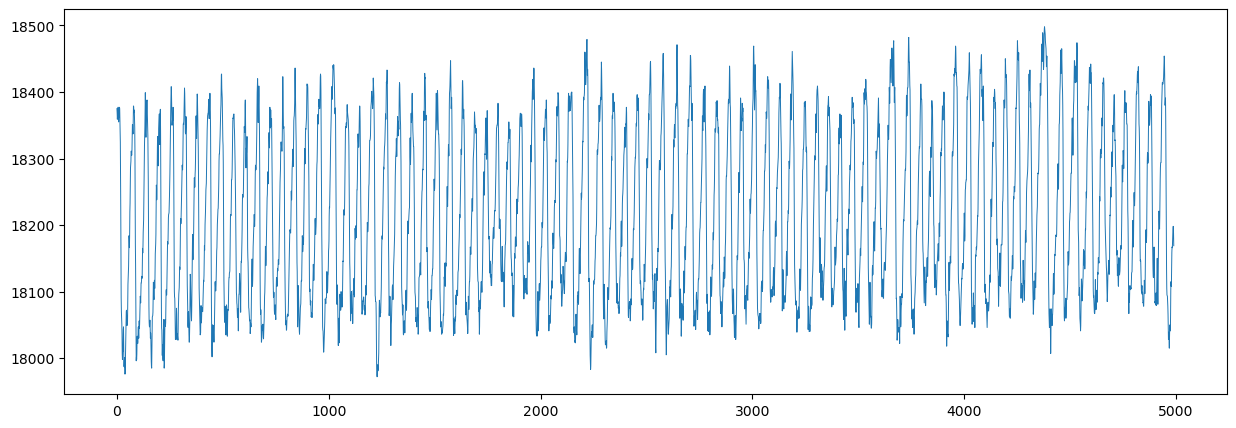

In [47]:
plt.figure(figsize=(15, 5))
plt.plot(processed[offset:,  x_pos, y_pos], linewidth=0.7)

In [9]:
dir(scipy)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_cupyx_scipy',
 '_ndarray',
 '_scipy',
 '_scipy_available',
 '_spmatrix',
 '_sys',
 'fft',
 'fftpack',
 'get_array_module',
 'sparse',
 'special']

In [35]:
import cupy
from cupyx.scipy import ndimage as ndimage_cupy

In [36]:
im_raw_cupy = cupy.array(im_raw)

In [37]:
print(timeit.timeit(lambda: ndimage_cupy.gaussian_filter1d(im_raw_cupy, sigma=1), number=10))

0.00218163200042909


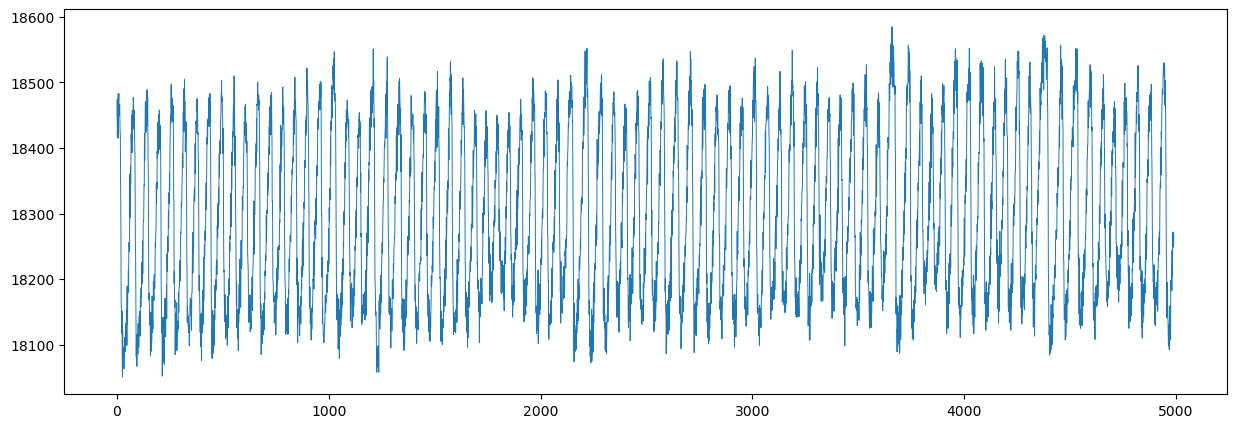

In [39]:
processed = cupy.asnumpy(ndimage_cupy.gaussian_filter1d(im_raw_cupy, sigma=1))
plt.figure(figsize=(15, 5))
plt.plot(processed[offset:,  x_pos, y_pos], linewidth=0.7)

In [4]:
import numpy as np

In [11]:
def generate_fake_data(size=128, frames=5000):
    data = np.array([np.random.rand(size, size)] * frames)
    data[:, 64, 64] = np.array([np.sin(np.linspace(-np.pi, np.pi, 200))] * (frames // 200)).flatten()

    data *= 100 
    data[:, 64, 64] += np.random.rand(*data[:, 64, 64].shape) * 50

    return data.astype('int')

In [10]:
data = generate_fake_data(frames=20000)
plt.figure(figsize=(15, 5))
plt.plot(data[offset:,  x_pos, y_pos], linewidth=0.7)

NameError: name 'plt' is not defined

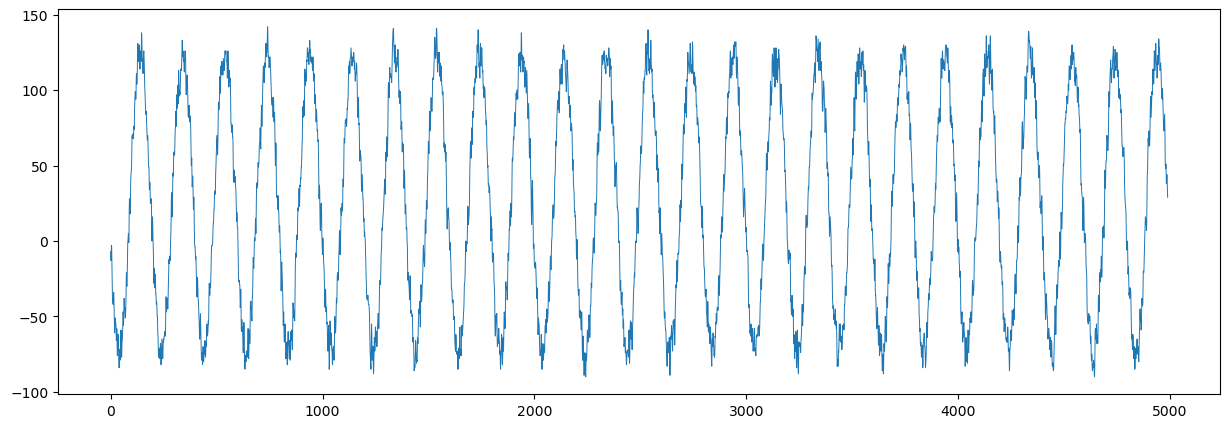

In [193]:
im_raw_cupy = cupy.array(data)
processed = cupy.asnumpy(ndimage_cupy.gaussian_filter1d(im_raw_cupy, axis=0, sigma=1))
plt.figure(figsize=(15, 5))
plt.plot(processed[offset:, x_pos, y_pos], linewidth=0.7)